# Import Dependencies

In [4]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from datetime import datetime
import pdb
import matplotlib.pyplot as plt
%matplotlib inline

# K-Means Class Definition

In [49]:
class Kmeans:
    
    def __init__(self, X, **kwargs):
        self.X = X
        self.N,self.D = X.shape
        self._set_options(**kwargs)
    
    def _set_options(self, **kwargs):
        self.beta = kwargs['beta'] if 'beta' in kwargs else 1
        self.epochs = kwargs['epochs'] if 'epochs' in kwargs else 30
        self.threshold = kwargs['threshold'] if 'threshold' in kwargs else 1e-2
        self.early_break = kwargs['early_break'] if 'early_break' in kwargs else True

    def distance2(self):
        self.D2 = np.sum( ( self.X - self.m.reshape([self.K,1,self.D]) )**2 , axis=2 )
    
    def responsibility(self):
        eD = np.exp( -self.beta * self.D2 )
        self.R = eD / eD.sum(axis=0)
    
    def mean(self):
        return (self.R @ self.X) / self.R.sum(axis=1, keepdims=True)
    
    def distortion(self):
        return (self.R * self.D2).sum()
    
    def fit(self, K):
        
        # start off with some random centroids
        idx = np.random.permutation(self.N)[:K]
        self.m = self.X.copy()[idx,:]
        
        # assign K
        self.K = K
        self.n = 0
        
        self.J = []

        for epoch in range(self.epochs):
            
            self.distance2() # update squared euclidean distance
            self.responsibility() # update responsability

            m = self.mean() # get new mean
            if self.early_break:
                dist = np.sqrt( np.sum( (self.m - m)**2 , axis=1 ) ) # find the distance between saved mean and new mean
                if np.all(dist < self.threshold): break # if distances for all K means are less than the threshold, stop early
            self.m = m # save new means
            self.n += 1 # increment counter
            
            self.J.append( self.distortion() )

# Donut
I tried setting 'early_break=False' & 'epochs=100'; but it didn't help

runtime: 0:00:00.013677


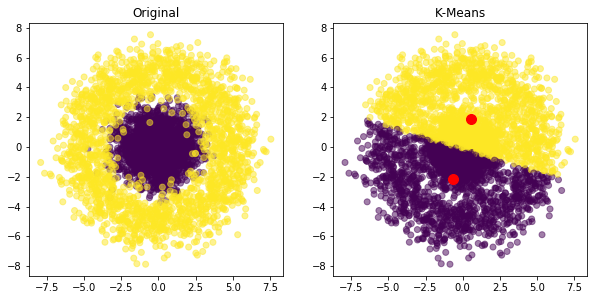

In [53]:
# import data
donut_data = pd.read_csv("../data/donut.csv", sep=' ', names=['x','y','c'])
donutX = donut_data.values
donut = Kmeans(donutX[:,:2])

t0 = datetime.now()
donut.fit(2)
dt = datetime.now() - t0
print(f"runtime: {dt}")

# plot data
fig,ax = plt.subplots(ncols=2, figsize=(10,10))

ax[0].scatter(donut_data.x, donut_data.y, c=donut_data.c, alpha=.5)
ax[0].set_aspect(1)
ax[0].set_title('Original')

ax[1].scatter(donut_data.x, donut_data.y, c=donut.R.argmax(axis=0), alpha=.5)
ax[1].scatter(donut.m[:,0], donut.m[:,1], s=100, c='r')
ax[1].set_aspect(1)
ax[1].set_title('K-Means')
fig.savefig("../images/K_means_donut.pdf")

# Dual Ellipse 1

# Dual Ellipse 2

In [51]:
donut.n

100